De gekozen dataset is afkomstig van [de University of Colorado, Irvine](https://archive.ics.uci.edu/dataset/571/hcv+data). Dezelfde dataset is gebruikt in een wetenschappelijk artikel, namelijk "Using machine learning techniques to generate laboratory diagnostic pathways—a case study" door Hoffman et al. (2018) en werd gepubliceerd in "Journal of Laboratory and Precision Medicine". 

De dataset gaat over patiënten met een leveraandoening, Hepatitis C. De data bestaat uit een groep gezonde proefpersonen en een groep patiënten met leveraandoeningen. De dataset bestaat uit 14 kolommen, waarbij 4 kolommen gaan over de patiënt (geslacht, leeftijd, gezond/ziek en ID) en 10 kolommen gaan over de waardes van de uitgevoerde laboratoriumtesten. Er is data van 615 patiënten. 

In [9]:
import pandas as pd
#import numpy as np
from matplotlib import pyplot as plt
#import seaborn as sns

We beginnen met het inlezen van de data. Deze wordt omgezet in een pandas DataFrame, zodat we een makkelijk overzicht hebben van de data.

In [2]:
hepatitis_c_csv = "HepatitisCdata.csv"

hepatitis_data = pd.read_csv(hepatitis_c_csv, sep=',', header=0)
hepatitis_data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Vervolgens wordt er aan de hand van de dataset een codebook gemaakt, zodat duidelijk is welke units worden gebruikt en wat de afkortingen van de testen betekenen. De dataset bestaat enkel uit patienteninformatie en laboratoriumtesten, deze gaan we allemaal meenemen om later uit te zoeken welke waarden mogelijk gecorreleerd zijn. Aan de hand daarvan gaan we kijken welke bloedwaarden het meeste zeggen over een Hepatitis C infectie.

In [3]:
codebook = {
    "attribute": ["ID", "Category", "Age", "Sex", "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT", "PROT"],
    "unit": ["a.u.", "n.a.", "years", "a.u.", "a.u.", "a.u.", "a.u.", "a.u.", "a.u.", "a.u.", "a.u.", "a.u.", "a.u.", "a.u."],
    "dtype": ["integer", "category", "integer", "category", "float", "float", "float", "float", "float", "float", "float", "float", "float", "float",],
    "description": [
        "Patient ID",
        "Diagnosis (0=Blood Donor, 0s=suspect Blood Donor, 1=Hepatitis, 2=Fibrosis, 3=Cirrhosis)",
        "Age",
        "Sex (M/F)",
        "Albumin",
        "Alkaline phosphatase",
        "Alanine aminotransferase",
        "Aspartate aminotransferase",
        "Bilirubin",
        "Cholinesterase",
        "Cholesterol",
        "Creatinine",
        "Gamma-glutamyltransferase",
        "Protein"
    ]
}

pd.DataFrame(codebook).set_index("attribute")

,unit,dtype,description
attribute,,,
ID,a.u.,integer,Patient ID
Category,n.a.,category,"Diagnosis (0=Blood Donor, 0s=suspect Blood Don..."
Age,years,integer,Age
Sex,a.u.,category,Sex (M/F)
ALB,a.u.,float,Albumin
ALP,a.u.,float,Alkaline phosphatase
ALT,a.u.,float,Alanine aminotransferase
AST,a.u.,float,Aspartate aminotransferase
BIL,a.u.,float,Bilirubin


We weten uit hoeveel rijen en kolommen de dataset bestaat, om zeker te weten of we de data volledig hebben ingeladen controleren we dit eerst nog even.

In [4]:
hepatitis_data.shape

(615, 14)

Conclusie:
De data is volledig ingeladen en klaar voor de Exploratory Data Analysis.

In [5]:
hepatitis_data.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


Omdat de kolom 'Unnamed' niet van belang is voor de EDA, wordt deze eruit gehaald. 

In [6]:
hepatitis_data.drop(hepatitis_data.columns[0], axis=1, inplace=True)

Om te controleren of dat goed is gegaan, wordt de dataset nog eens aangeroepen:

In [7]:
hepatitis_data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


Er is te zien dat er nu nog maar 13 kolommen zijn in plaats van 14. Nu de patient ID's uit de dataset zijn gehaald, kan er verder gegaan worden.

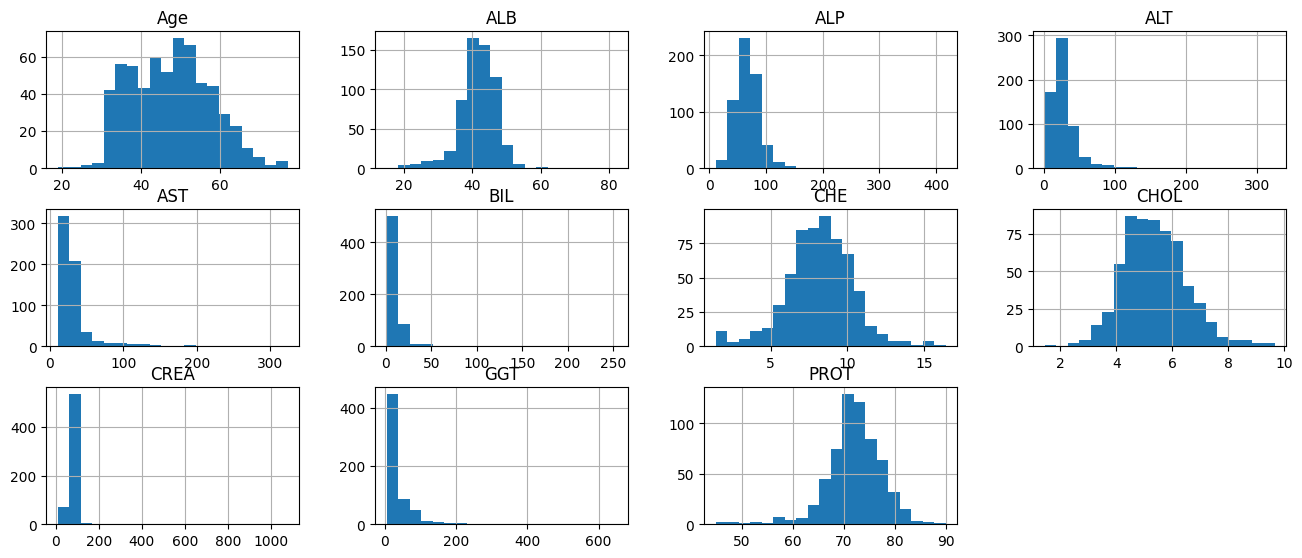

In [10]:
hepatitis_data.hist(bins=20, layout=(3, 4), figsize=(16.0, 6.4));

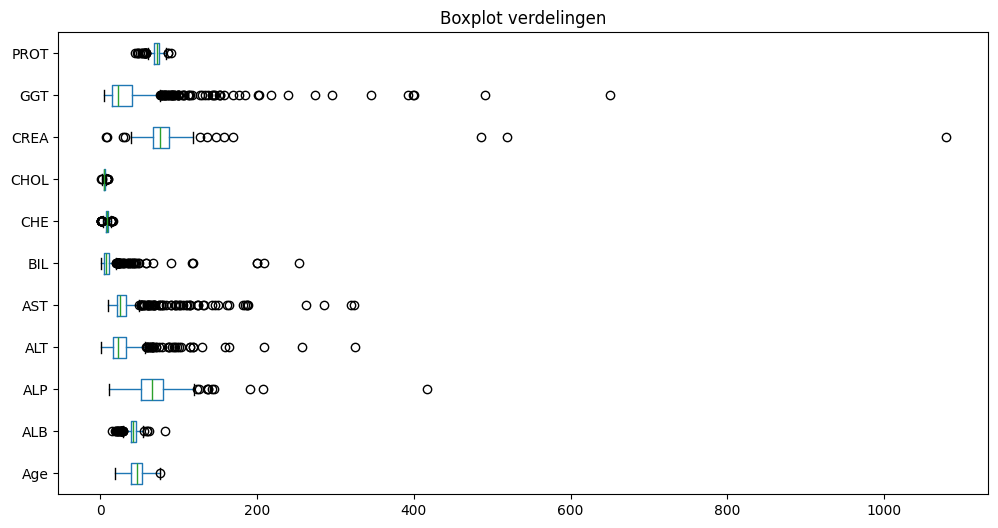

In [11]:
axs = hepatitis_data.boxplot(grid=False, vert=False, figsize=(12.0, 6.0))
axs.set_title("Boxplot verdelingen");